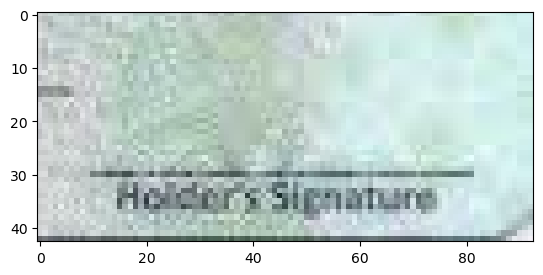

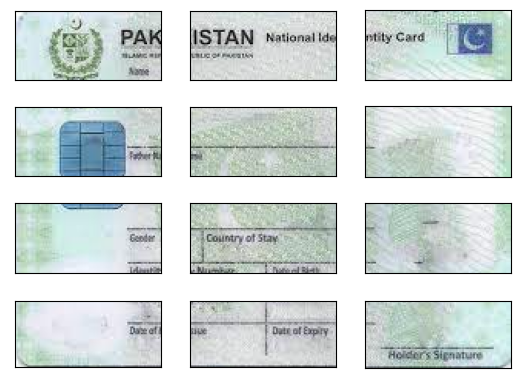

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
cols=3
rows=4
def split_image_into_parts(image, cols=6, rows=2):
    #img = cv2.imread('baboon.png')
 
    # cv2.imread() -> takes an image as an input


    height, width ,channels = img.shape
    img_height = int(np.ceil(height / rows))
    img_width = int(np.ceil(width / cols))

    n_img = []
    for row in range(rows):
        for col in range(cols):
            x = col * img_width
            y = row * img_height
            sub_img = img[y:y+img_height, x:x+img_width]
            n_img.append(sub_img)
    plt.imshow(n_img[-1])
    cv2.imwrite("signatures_part1.png",n_img[-1])
    #cv2.imshow('Bottom', bottom)# your code here
    return n_img

img = cv2.imread('download.jpg')


im_parts = split_image_into_parts(img, cols=cols, rows=rows)

fig, axes = plt.subplots(nrows=rows, ncols=cols)
for i, ax in enumerate(axes.flat):
    ax.imshow(im_parts[i])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()
# your code here



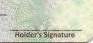

In [2]:
display(Image.open("signatures_part1.png"))

In [3]:
img = Image.open("signatures_part1.png").convert('RGB')
img.size

(93, 43)

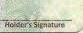

True

In [4]:
# IMAGE_PATH => Path to the image
img = Image.open("signatures_part1.png").convert('RGB')
  
# Extracting the image data &
# creating an numpy array out of it
img_arr = np.array(img)
  
# Turning the pixel values of the 400x400 pixels to black 
cropped_image = img_arr[10:, 10:]
  
# Creating an image out of the previously modified array
img = Image.fromarray(cropped_image)
display(img)
cv2.imwrite("cropped_image.png",cropped_image)

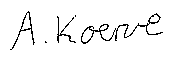

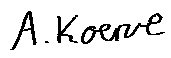

True

In [5]:
import cv2
import numpy as np
img = cv2.imread('img_dataset/00101014.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresher = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,3,7)
kernel = np.ones((1,2),np.uint8)
erosion = cv2.erode(thresher,kernel,iterations = 2)

#dilation = cv2.dilate(thresh,kernel,iterations = 1)

#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

#closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
display(Image.fromarray(thresher))
display(Image.fromarray(erosion))
cv2.imwrite("erosion.png",erosion)

In [6]:
img1 = cv2.imread('cropped_image.png')
img2= cv2.imread('erosion.png')

In [7]:
img1.shape

(33, 83, 3)

In [8]:
img2.shape

(58, 171, 3)

In [9]:
resized_shape= img1.shape[:2]
resized_shape

(33, 83)

In [10]:
img2= cv2.resize(img2,(83,33))

In [11]:
img2.shape

(33, 83, 3)

In [12]:
x= cv2.addWeighted(img1,0.4,img2,0.6,0)

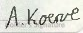

In [13]:
display(Image.fromarray(x))

In [14]:
cv2.imwrite("New_Image.png",x)

True

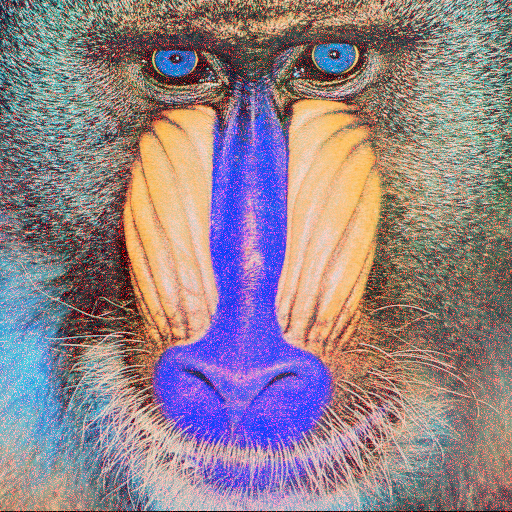

In [15]:
img = cv2.imread('baboon.png')
def add_noise(img):
    noise = np.zeros(img.shape, dtype=np.uint8)
    cv2.randn(noise, 0, 100)
    noisy_img = cv2.add(img, noise)
    return noisy_img

noisy_img = add_noise(img)
display(Image.fromarray(noisy_img))

In [16]:
import PIL
import cv2
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter, ImageOps
import random
import os

input_folder = "/home/nouman/Downloads/training_batch/week 3/computer vision/img_dataset"
output_folder = "output"
for filename in os.listdir(input_folder):
        img = cv2.imread(os.path.join(input_folder, filename), cv2.IMREAD_GRAYSCALE)
        thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 5, 8)
        kernel = np.ones((1, 2), np.uint8)
        erosion = cv2.erode(thresh, kernel, iterations=1)
        back = erosion.copy()
        back = Image.fromarray(back)
        back = back.resize((239, 86))
        cnic = cv2.imread("download.jpg")
        cnic = cv2.cvtColor(cnic, cv2.COLOR_BGR2RGB)
        cnic = Image.fromarray(cnic)
        l = 230
        t = 100
        r = 283
        b = 140
        crop = cnic.crop((l, t, r, b))
        r_crop = crop.resize((239, 86))
        mask = Image.new("L", back.size, 100)
        result = Image.composite(r_crop, back, mask)
        output_filename = os.path.splitext(filename)[0] + "_result.png"
        output_path = os.path.join(output_folder, output_filename)
        result.save(output_path)

In [17]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar  3 15:45:41 2023

@author: nouman
"""
import cv2
import glob 
import os
from PIL import Image
from numpy import random
output_directory= "/home/nouman/Downloads/training_batch/week 3/computer vision/new_output"
for image in glob.glob('/home/nouman/Downloads/training_batch/week 3/computer vision/cat_dog/*'):
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

# load the input image
    im = Image.open(image)
    
    # define the brightness adjustment range
    brightness_range = (-50, 50)
    
    
    # generate 5 images with different brightness levels
    for i in range(5):
        # generate a random brightness level
        brightness_level = random.randint(*brightness_range)
        
    
        # adjust the brightness level of the image
        adjusted_image = im.point(lambda x: x + brightness_level)
    
        # save the adjusted image to the output directory
        output_filename = image.split("/")[-1].split('.')[0]+f'{i}'+'.png'
        #noise_filename= image.split("/")[-1].split('.')[0]+ 'noise'+f'{i}'+'.png'
        
        output_path = os.path.join(output_directory, output_filename)
        adjusted_image.save(output_path)
    
    # save the original image to the output directory as well
        #output_filename = "brightness_adjusted_image_Original.jpg"
        #output_path = os.path.join(output_directory, output_filename)
        #image.save(output_path)

In [18]:
import cv2
import glob 
import os
from PIL import Image
from numpy import random

input_folder = "cat_dog"
output_folder = "noise"

for filename in os.listdir(input_folder):
    img = Image.open(os.path.join(input_folder, filename))

    for j in range(5):
        for i in range(int(img.size[0]*img.size[1])):
            img.putpixel((random.randint(0, img.size[0]-1), random.randint(0, img.size[1]-1)),(random.randint(0,255),random.randint(0,255),random.randint(0,255)))
        output_filename = os.path.splitext(filename)[0] + "_result" + str(j) + ".png"
        output_path = os.path.join(output_folder, output_filename)
        img.save(output_path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2
import os
input_folder = "cat_dog"
output_folder = "rotate"
for filename in os.listdir(input_folder):
    img = Image.open(os.path.join(input_folder, filename))

    for j in range(5,180,5):
        img= img.rotate(j)
        output_filename = os.path.splitext(filename)[0] + "rotate" + str(j) + ".png"
        output_path = os.path.join(output_folder, output_filename)
        img.save(output_path)

In [ ]:
import json
import os
import cv2
from PIL import Image

# specify the paths for the JSON file and the images directory
json_path = "cat_dog.json"
images_dir = "cat_dog"

# load the JSON file
with open(json_path, 'r') as f:
    data = json.load(f)

# create the class dictionary from the JSON file
class_dict = {}
class_counter = 0
for img_id, img_data in data['_via_img_metadata'].items():
    for region in img_data['regions']:
        class_name = region['region_attributes']['class']
        if class_name not in class_dict.values():
            class_dict[class_counter] = class_name
            class_counter += 1

# loop over each image in the JSON file
for img_id, img_data in data['_via_img_metadata'].items():

    filename = os.path.splitext(img_data['filename'])[0]
    img_path = os.path.join(images_dir, img_data['filename'])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # loop over each region in the image
    with open(f'{os.path.join(images_dir,filename)}.txt', 'w') as f:
        for region in img_data['regions']:
            # extract the bounding box coordinates
            x = region['shape_attributes']['x']
            y = region['shape_attributes']['y']
            w = region['shape_attributes']['width']
            h = region['shape_attributes']['height']
            
            # get the class name and ID for the region
            class_name = region['region_attributes']['class']
            class_id = list(class_dict.keys())[list(class_dict.values()).index(class_name)]
            
            # write the class ID and bounding box coordinates to the output file
            f.write(f"{class_id} {((x + w / 2) / img.shape[1]):.6f} {((y + h / 2) / img.shape[0]):.6f} {(w / img.shape[1]):.6f} {(h / img.shape[0]):.6f}\n")
            
            cv2.rectangle(img, (x, y), (x+w, y+h), (255,0, 0), 3)

    display(Image.fromarray(img))